In [1]:
#for array
import numpy as np
#for dataset
import pandas as pd
#for visualization
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
#overview of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
#dimension of dataset
df.shape

(150, 5)

In [11]:
#overview of number of non-nan records in a column
df.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
dtype: int64

In [12]:
#numerical data statistical summary
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
#categorical data group summary of a column
df["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [14]:
#percentage distribution of each unique data in a column
df.target.value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: target, dtype: float64

In [15]:
#detecting missing data from the whole dataset
df.isnull().sum().sum()

0

In [16]:
#detecting duplicated data
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2


In [20]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

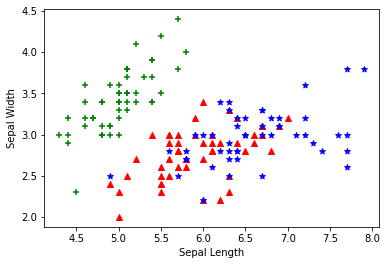

In [21]:
#visualize with scatter plot
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color="green", marker='+')
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color="red", marker='^')
plt.scatter(df2["sepal length (cm)"], df2["sepal width (cm)"], color="blue", marker='*')

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis = 'columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [24]:
len(X_train)

120

In [25]:
len(X_test)

30

In [30]:
#train using KNN model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [31]:
model.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [32]:
model.score(X_test, y_test)

0.9666666666666667

In [37]:
#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(42.0, 0.5, 'Truth')

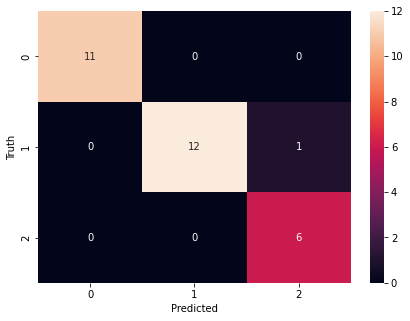

In [38]:
#visualize confusion matrix
%matplotlib inline
import seaborn as sn
plt.figure(figsize = (7, 5))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')